In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
# class 0:
# covariance matrix and mean
cov0 = np.array([[5,-4],[-4,4]])
mean0 = np.array([2.,3])
# number of data points
m0 = 1000

# class 1
# covariance matrix
cov1 = np.array([[5,-3],[-3,3]])
mean1 = np.array([1.,1])
# number of data points
m1 = 1000

# generate m gaussian distributed data points with
# mean and cov.
r0 = np.random.multivariate_normal(mean0, cov0, m0)
r1 = np.random.multivariate_normal(mean1, cov1, m1)

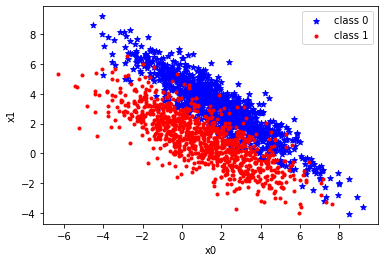

In [3]:
plt.scatter(r0[...,0], r0[...,1], c='b', marker='*', label="class 0")
plt.scatter(r1[...,0], r1[...,1], c='r', marker='.', label="class 1")
plt.xlabel("x0")
plt.ylabel("x1")
plt.legend()
plt.show()

X = np.concatenate((r0,r1))
y = np.ones(len(r0)+len(r1))
y[:len(r0),] = 0

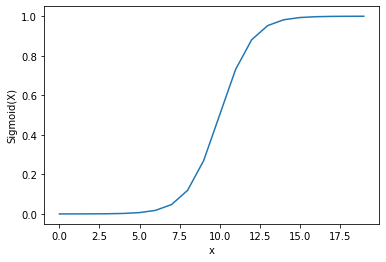

In [4]:
def logistic_function(x):
    sig = 1/(1 + np.exp(-x))
    return sig

x = np.arange(-10,10)

plt.plot(logistic_function(x))
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
  
plt.show()

In [5]:
def logistic_hypothesis(theta):
    return lambda x: logistic_function(np.concatenate((np.ones((len(x[:,0]), 1)), x), axis=1).dot(theta))

In [6]:
theta = np.array([1.1, 2.0, -.9])
h = logistic_hypothesis(theta)
print(h(X))

[0.9958349  0.98671681 0.02723672 ... 0.99622928 0.19445398 0.02373857]


In [7]:
def cross_entropy_costs(h, X, y):
    def f (X,t):
        hyp=h(t)
        return hyp(X)
   
    return lambda t: -y*np.log(f(X,t))-(1-y)*np.log(1-f(X,t))
    

In [8]:
theta = np.array([1.,2.,3.])
costs = cross_entropy_costs(logistic_hypothesis, X, y)
print(costs(theta))

[1.59114686e+01 1.97705567e+01 1.51960008e+01 ... 1.10574391e-05
 2.30959613e-02 1.41400326e-01]


In [9]:
def mean_cross_entropy_costs(X, y, hypothesis, cost_func, lambda_reg=0.1):
    m = len(X)
    def f (X,y,hypothesis,cost_func,t):
        cost = cost_func(hypothesis,X,y)
        return cost(t)
        
    return lambda theta: 1./(float(m)) * np.sum(f(X,y,hypothesis,cost_func,theta))
    

In [10]:
theta = np.array([1.,2.,3.])
J = mean_cross_entropy_costs(X,y, logistic_hypothesis, cross_entropy_costs, 0.1)
print(J(theta))

7.088399943478709


In [11]:
def compute_new_theta(X, y, theta, learning_rate, hypothesis, lambda_reg=0.1):
    m = len(X[:,0])
    X_ = np.concatenate((np.ones([m,1]), X), axis=1)
    theta = theta  - learning_rate / float(m) * (X_.T.dot(hypothesis(theta)(X) - y))
    return theta

In [12]:
theta = np.array([1.,2.,3.])
theta = compute_new_theta(X, y, theta, .1, logistic_hypothesis, .1)
print(theta)

[0.95276632 1.90688989 2.84317359]


In [13]:
def gradient_descent(X, y, theta, learning_rate, num_iters, lambda_reg=0.1):
    history_cost = np.zeros(num_iters)
    history_theta = np.zeros([num_iters, len(theta)])
    cost = mean_cross_entropy_costs(X, y,logistic_hypothesis,cross_entropy_costs)
    for i in range(num_iters):
        history_theta[i] = theta
        history_cost[i] = cost(theta)
        theta = compute_new_theta(X, y, theta, learning_rate,logistic_hypothesis)
    return history_cost, history_theta

In [14]:
alpha = 1
theta = np.array([1.5,2,4])
num_iters = 1000
history_cost, history_theta = gradient_descent(X, y, theta, alpha, num_iters)

In [15]:
def plot_progress(costs):
    plt.plot(costs)
    plt.xlabel("Iterations")
    plt.ylabel("Kosten")
    plt.show()

In [16]:
print("costs before the training:\t ", history_cost[0])
print("costs after the training:\t ", history_cost[-1])
history_theta[0,0]

costs before the training:	  8.906107462039738
costs after the training:	  0.22894883804837224


1.5

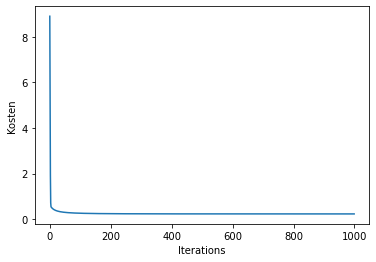

In [17]:
plot_progress(history_cost)

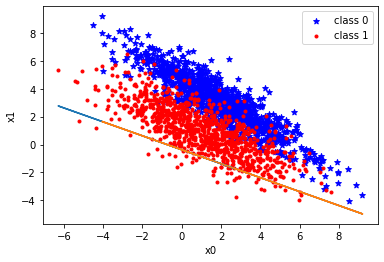

[[ 3.40395429  2.70118664]
 [ 3.39963493  3.99042895]
 [-0.16029796  4.8388655 ]
 ...
 [ 2.92324265  1.5219721 ]
 [-0.65167947  1.35329541]
 [-1.75047729  1.46186056]]


In [21]:
plt.scatter(r0[...,0], r0[...,1], c='b', marker='*', label="class 0")
plt.scatter(r1[...,0], r1[...,1], c='r', marker='.', label="class 1")
plt.xlabel("x0")
plt.ylabel("x1")
plt.legend()


x_1=X
x_2 = -(history_theta[0,0]+history_theta[0,1]*x_1)/history_theta[0,2]

plt.plot(x_1,x_2)
plt.show()



In [33]:
h = logistic_hypothesis(theta)
count = 0
for x in h(X):
    if x >= 0.5:
        count=count+1

print("Accuracy :\t ", (count/len(X))*100,"%")


Accuracy :	  97.7 %
